# Importando bibliotecas necessárias

In [64]:
# CONFIGURAÇÃO DO AMBIENTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [66]:
# Configuração de estilo para os gráficos
sns.set_theme(style="whitegrid")

# Coleta de dados

In [67]:
# COLETA DE DADOS (Extração da API / GitHub)

url_api = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

print(" Conectando à base da Telecom X e extraindo dados...")

df_telecom = pd.read_json(url_api)

print(" Extração concluída com sucesso! Visualizando as 5 primeiras linhas:")

# Exibindo o cabeçalho do DataFrame
display(df_telecom.head())

 Conectando à base da Telecom X e extraindo dados...
 Extração concluída com sucesso! Visualizando as 5 primeiras linhas:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# Limpeza e Tratamento de Dados (ETL)

In [69]:
# ETL: TRANSFORMAÇÃO DE DADOS
print("Iniciando a Transformação: Desempacotando colunas aninhadas...")

# 1. Desempacotando cada coluna que contém dicionários
df_customer = pd.json_normalize(df_telecom['customer'])
df_phone = pd.json_normalize(df_telecom['phone'])
df_internet = pd.json_normalize(df_telecom['internet'])
df_account = pd.json_normalize(df_telecom['account'])

Iniciando a Transformação: Desempacotando colunas aninhadas...


In [70]:
# Separando as colunas base
df_base = df_telecom[['customerID', 'Churn']]

In [71]:
# Juntando (concatenando) tudo em um novo DataFrame limpo
df_limpo = pd.concat([df_base, df_customer, df_phone, df_internet, df_account], axis=1)

print("Transformação concluída!")
display(df_limpo.head())

# Verificando o tamanho da nova base e os tipos de dados
print("\n Resumo da nova base de dados:")
df_limpo.info()

Transformação concluída!


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4



 Resumo da nova base de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract  

Acertos de ultima hora verificando erros:

In [39]:
# Verificando registros duplicados no DataFrame final (pós-ETL)
duplicados = df_limpo.duplicated().sum()

print("Quantidade de registros duplicados:", duplicados)


Quantidade de registros duplicados: 0


In [72]:
# (Diagnóstico profissional) - Conferir nomes reais das colunas
print("Listando nomes reais das colunas do DataFrame:")

for col in df_limpo.columns:
    print(col)




Listando nomes reais das colunas do DataFrame:
customerID
Churn
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Charges.Monthly
Charges.Total


Limpeza dos dados

In [73]:
# ETL: LIMPANDO TIPOS DE DADOS E CARGA (Salvando o arquivo)
print("Iniciando a Limpeza Final de Dados...")

# 1. Renomeando colunas para facilitar a digitação (tirando os pontos)
df_limpo = df_limpo.rename(columns={'Charges.Monthly': 'MonthlyCharges',
                                    'Charges.Total': 'TotalCharges'})


Iniciando a Limpeza Final de Dados...


In [74]:
# Convertendo TotalCharges de Texto (object) para Número Decimal (float)

df_limpo['TotalCharges'] = pd.to_numeric(df_limpo['TotalCharges'], errors='coerce')


In [75]:
# Converter TotalCharges para número (float)
df_limpo['TotalCharges'] = pd.to_numeric(df_limpo['TotalCharges'], errors='coerce')

print("Tipos de dados após conversão:")
print(df_limpo[['MonthlyCharges', 'TotalCharges']].dtypes)


Tipos de dados após conversão:
MonthlyCharges    float64
TotalCharges      float64
dtype: object


In [76]:
# Verificando valores nulos após a conversão
print("Valores nulos em TotalCharges:")
print(df_limpo['TotalCharges'].isnull().sum())


Valores nulos em TotalCharges:
11


In [77]:
# Salvando trabalho para o futuro
nome_arquivo = "telecomx_churn_limpo.csv"
df_limpo.to_csv(nome_arquivo, index=False)
print(f"\n SUCESSO! Etapa de ETL concluída. Base salva como '{nome_arquivo}'.")


 SUCESSO! Etapa de ETL concluída. Base salva como 'telecomx_churn_limpo.csv'.


# Exportação do Dataset Limpo

In [78]:
from google.colab import files

# Baixando o arquivo limpo para o computador
files.download('telecomx_churn_limpo.csv')
print("Download iniciado! Verifique a pasta de downloads.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download iniciado! Verifique a pasta de downloads.


Apos verificação foi incluido este novo codigo para download do arquivo atualizado para subir para o github

In [79]:
# Salvando o DataFrame limpo e atualizado em CSV
df_limpo.to_csv('telecomx_churn_limpo_atualizado.csv', index=False)

print("Arquivo atualizado salvo com sucesso!")


Arquivo atualizado salvo com sucesso!


In [48]:
from google.colab import files

# Baixando o arquivo limpo atualizado
files.download('telecomx_churn_limpo_atualizado.csv')

print("Download iniciado! Verifique a pasta de downloads.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download iniciado! Verifique a pasta de downloads.


# Análise Exploratória de Dados (EDA)

In [49]:
# Verificando o tamanho do dataset antes da limpeza
print(f"Total de clientes antes da limpeza: {df_limpo.shape[0]}")

# Removendo definitivamente as linhas onde a coluna 'Churn' está vazia (NaN)
df_limpo = df_limpo.dropna(subset=['Churn'])

# Aplicando a tradução de forma definitiva no dataframe limpo
dicionario_traducao = {'No': 'Não Cancelou', 'Yes': 'Cancelou'}
df_limpo['Churn'] = df_limpo['Churn'].replace(dicionario_traducao)

# Verificando o tamanho do dataset depois da limpeza
print(f"Total de clientes após a limpeza: {df_limpo.shape[0]}")

Total de clientes antes da limpeza: 7043
Total de clientes após a limpeza: 7043


In [50]:
# Descobrir todos os valores únicos da coluna)
print("Valores únicos encontrados na coluna Churn:")
print(df_limpo['Churn'].unique())
print("-" * 40)

# Mantendo APENAS as linhas válidas (antes ou depois da tradução)
valores_validos = ['Yes', 'No', 'Cancelou', 'Não Cancelou']
df_limpo = df_limpo[df_limpo['Churn'].isin(valores_validos)].copy()

# Garantindo a tradução para um português polido
dicionario_traducao = {'No': 'Não Cancelou', 'Yes': 'Cancelou'}
df_limpo['Churn'] = df_limpo['Churn'].replace(dicionario_traducao)

# Verificando o resultado final
print(f"Total de clientes após a limpeza forçada: {df_limpo.shape[0]}")

Valores únicos encontrados na coluna Churn:
['Não Cancelou' 'Cancelou']
----------------------------------------
Total de clientes após a limpeza forçada: 7043


# Visualização de Dados e Insights

In [80]:
# Garantindo a tradução da coluna antes de gerar o gráfico ---
dicionario_contrato = {
    'Month-to-month': 'Mensal',
    'One year': '1 Ano',
    'Two year': '2 Anos'
}
# Aplicando a tradução na coluna Contract
df_limpo['Contract'] = df_limpo['Contract'].replace(dicionario_contrato)

# Para confirmaçãp dos nomes em português:
print("Valores atuais na coluna Contract:", df_limpo['Contract'].unique())

# Definindo a ordem cronológica
ordem_contratos = ['Mensal', '1 Ano', '2 Anos']
# ... resto do código ...

Valores atuais na coluna Contract: ['1 Ano' 'Mensal' '2 Anos']


/tmp/ipython-input-889449843.py:5: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(


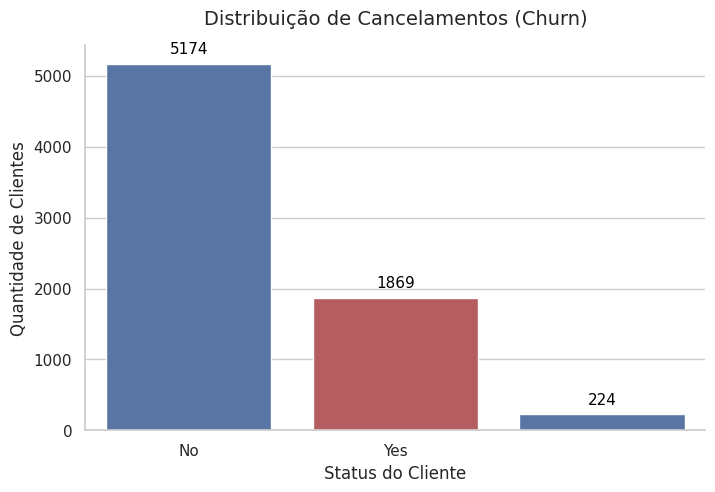

In [81]:
# Configurando o tamanho da figura
plt.figure(figsize=(8, 5))

# Criando o gráfico (agora sem o UserWarning)
ax = sns.countplot(
    data=df_limpo,
    x='Churn',
    hue='Churn',
    palette=['#4C72B0', '#C44E52'], # Azul para Retidos, Vermelho para Cancelados
    legend=False
)

# Textos e Rótulos em Português
plt.title('Distribuição de Cancelamentos (Churn)', fontsize=14, pad=15)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)

# Adicionando os números exatos em cima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Removendo as bordas superior e direita para um visual moderno
sns.despine()

plt.show()

/tmp/ipython-input-4247079915.py:7: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(


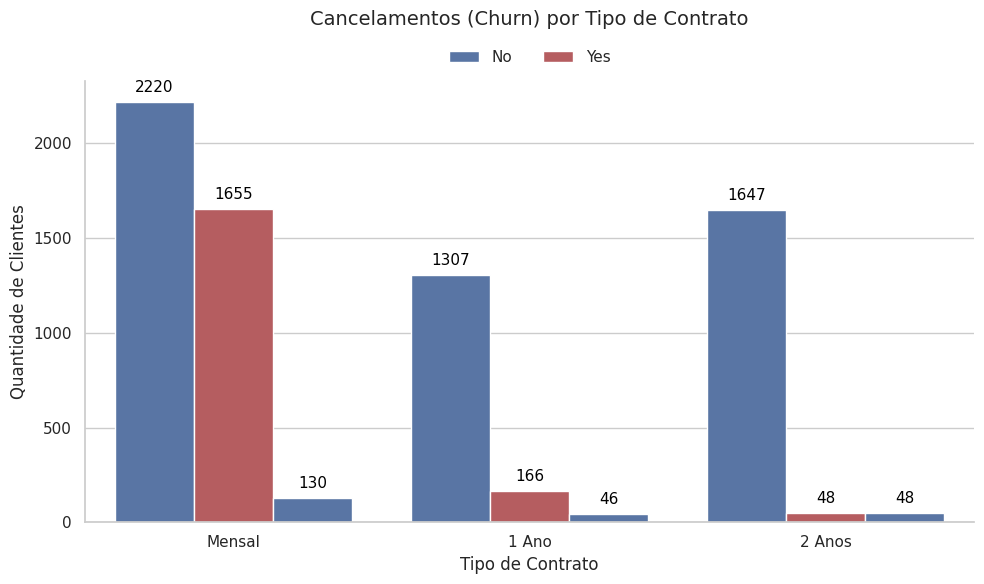

In [82]:
# --- Definindo a ordem cronológica ---
ordem_contratos = ['Mensal', '1 Ano', '2 Anos']

# Configurando o visual do gráfico
plt.figure(figsize=(10, 6))

ax = sns.countplot(
    data=df_limpo,
    x='Contract',
    hue='Churn',
    palette=['#4C72B0', '#C44E52'], # Azul para Não Cancelou, Vermelho para Cancelou
    order=ordem_contratos
)

# Melhorando a apresentação (Títulos e Rótulos)
plt.title('Cancelamentos (Churn) por Tipo de Contrato', fontsize=14, pad=40)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)

# LEGENDA POLIDA
plt.legend(
    title='',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.10),
    ncol=2,
    frameon=False,
    fontsize=11
)

# Adicionando os números exatos em cima das barras
for p in ax.patches:
    altura = p.get_height()
    if pd.notna(altura) and altura > 0:
        ax.annotate(f'{int(altura)}',
                    (p.get_x() + p.get_width() / 2., altura),
                    ha='center', va='bottom',
                    fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Limpeza final do visual
sns.despine()
plt.tight_layout()
plt.show()

/tmp/ipython-input-2846457734.py:15: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(


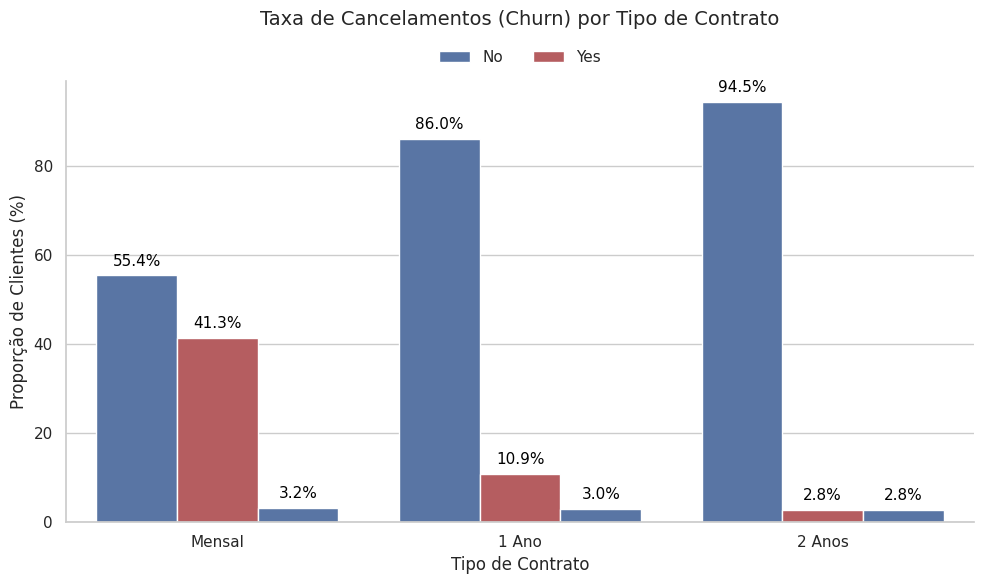

In [83]:
# Preparando os dados em Porcentagem (%)
df_pct = (df_limpo.groupby('Contract')['Churn']
          .value_counts(normalize=True)
          .rename('Percentual')
          .reset_index())

df_pct['Percentual'] *= 100

# --- A ORDENAÇÃO ---
ordem_contratos = ['Mensal', '1 Ano', '2 Anos']

# Configurando o visual do gráfico
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=df_pct,
    x='Contract',
    y='Percentual',
    hue='Churn',
    palette=['#4C72B0', '#C44E52'],
    order=ordem_contratos # Forçando a ordem cronológica no eixo X
)

# Melhorando a apresentação (Títulos e Rótulos)
plt.title('Taxa de Cancelamentos (Churn) por Tipo de Contrato', fontsize=14, pad=40)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Proporção de Clientes (%)', fontsize=12)

# Legenda Polida no Topo
plt.legend(
    title='',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.10),
    ncol=2,
    frameon=False,
    fontsize=11
)

# Adicionando as porcentagens exatas em cima das barras
for p in ax.patches:
    altura = p.get_height()
    if pd.notna(altura) and altura > 0:
        ax.annotate(f'{altura:.1f}%',
                    (p.get_x() + p.get_width() / 2., altura),
                    ha='center', va='bottom',
                    fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Limpeza final do visual
sns.despine()
plt.tight_layout()
plt.show()

## Análise de Cancelamento vs. Tempo de Permanência (Tenure)

Boxplot do Tempo de Permanência (Tenure)

/tmp/ipython-input-3669944616.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


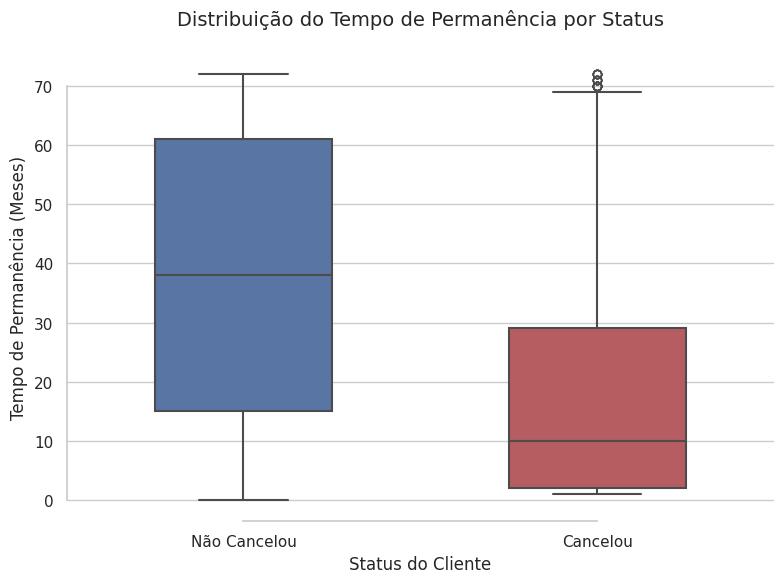


--- Resumo Estatístico do Tempo de Permanência (Meses) ---
               count  mean   50%   std
Churn                                 
Cancelou      1869.0  18.0  10.0  19.5
Não Cancelou  5174.0  37.6  38.0  24.1


In [55]:
# Configurando o visual do gráfico
plt.figure(figsize=(8, 6))

# Criando o Boxplot
ax = sns.boxplot(
    data=df_limpo,
    x='Churn',
    y='tenure',
    palette=['#4C72B0', '#C44E52'], # Azul e Vermelho
    order=['Não Cancelou', 'Cancelou'], # Mantendo a consistência da leitura
    width=0.5,
    linewidth=1.5 # Linhas mais definidas
)

# Melhorando a apresentação (Títulos e Rótulos)
plt.title('Distribuição do Tempo de Permanência por Status', fontsize=14, pad=20)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Tempo de Permanência (Meses)', fontsize=12)

# Limpeza final do visual
sns.despine(trim=True)
plt.tight_layout()
plt.show()

# Imprimindo as estatísticas descritivas (Foco na Mediana)
print("\n--- Resumo Estatístico do Tempo de Permanência (Meses) ---")
resumo_estatistico = df_limpo.groupby('Churn')['tenure'].describe()
# Selecionando apenas contagem, média, mediana (50%) e desvio padrão para ser direto
print(resumo_estatistico[['count', 'mean', '50%', 'std']].round(1))

Análise de Cancelamento vs. Tempo de Permanência (Tenure)

A análise da distribuição do tempo de permanência revela que o risco de Churn é altamente concentrado no início da jornada do cliente:

Janela Crítica de Cancelamento: A mediana aponta que 50% de todos os clientes que cancelam vão embora nos primeiros 10 meses de assinatura. Em contrapartida, clientes fidelizados apresentam uma mediana de permanência de 38 meses.

Assimetria dos Dados: Para o grupo que cancelou, a média (18 meses) é consideravelmente maior que a mediana (10 meses). Estatisticamente, isso indica uma distribuição assimétrica, provando que o volume de cancelamentos é massivo nos primeiros meses e vai caindo ao longo do tempo.

Insight de Negócio (Ação): Os esforços de retenção, suporte proativo e campanhas de fidelização devem ser direcionados agressivamente para o primeiro ano de vida do cliente (especialmente antes do 10º mês). Superar essa barreira inicial é o fator chave para garantir a retenção a longo prazo.

## Histograma de Tempo de Permanência (Tenure)

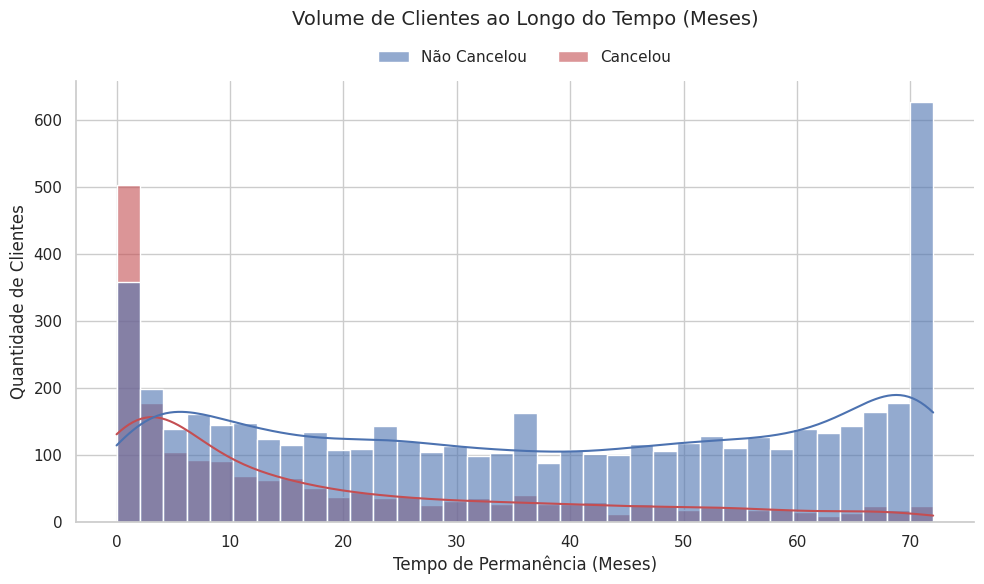

In [56]:
# Configurando o visual do gráfico
plt.figure(figsize=(10, 6))

# Criando o Histograma com linha de tendência (KDE)
ax = sns.histplot(
    data=df_limpo,
    x='tenure',
    hue='Churn',
    palette=['#4C72B0', '#C44E52'],
    hue_order=['Não Cancelou', 'Cancelou'],
    bins=35,
    kde=True,
    alpha=0.6
)

# Melhorando a apresentação (Títulos e Rótulos)
plt.title('Volume de Clientes ao Longo do Tempo (Meses)', fontsize=14, pad=40)
plt.xlabel('Tempo de Permanência (Meses)', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)

# A Legenda Polida no Topo
sns.move_legend(
    ax,
    "upper center",
    bbox_to_anchor=(0.5, 1.10),
    ncol=2,
    title=None,
    frameon=False,
    fontsize=11
)

# Limpeza final do visual
sns.despine()
plt.tight_layout()
plt.show()

Zoom in Cirurgico dentro dos cancelados

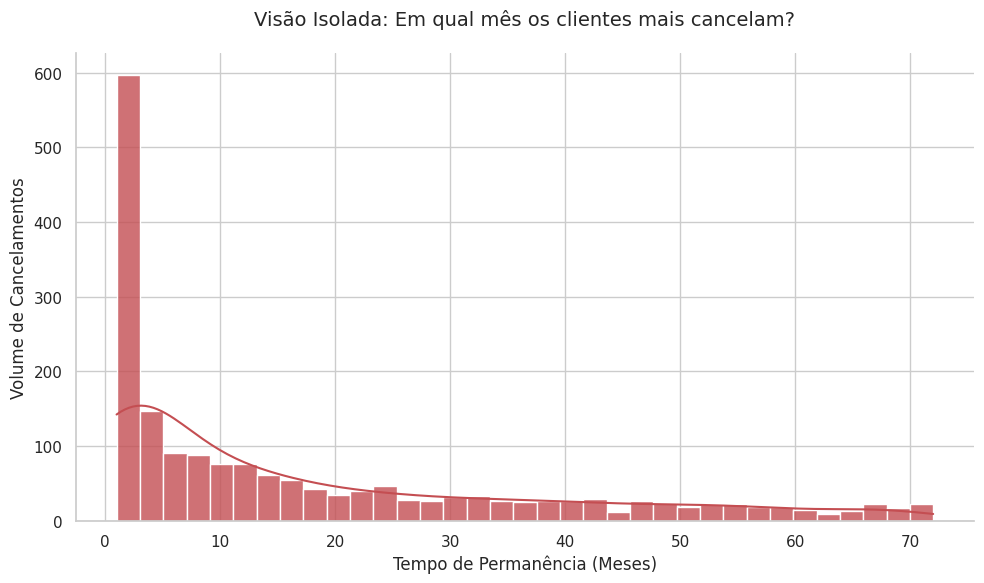

In [57]:
# Criando um DataFrame temporário apenas com quem cancelou
df_cancelou = df_limpo[df_limpo['Churn'] == 'Cancelou']

# Configurando o visual do gráfico
plt.figure(figsize=(10, 6))

# Criando o Histograma apenas com a cor vermelha
sns.histplot(
    data=df_cancelou,
    x='tenure',
    color='#C44E52',
    bins=35,
    kde=True,
    alpha=0.8
)

# Melhorando a apresentação (Títulos e Rótulos)
plt.title('Visão Isolada: Em qual mês os clientes mais cancelam?', fontsize=14, pad=20)
plt.xlabel('Tempo de Permanência (Meses)', fontsize=12)
plt.ylabel('Volume de Cancelamentos', fontsize=12)

# Limpeza final do visual
sns.despine()
plt.tight_layout()
plt.show()

Zoom in nos Primeiros 10 meses. O raio X da quetsão

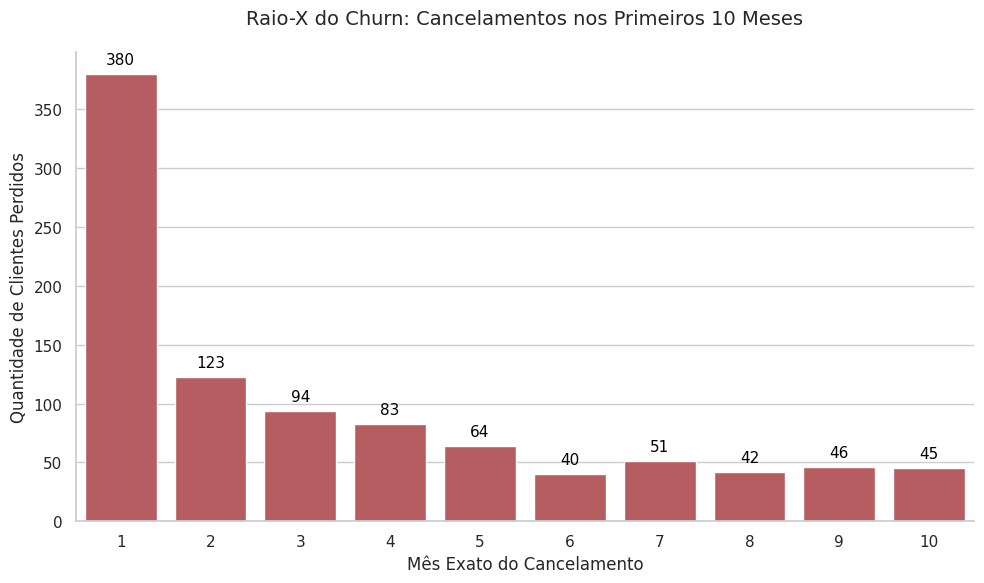

In [58]:
# O FILTRO DUPLO CIRÚRGICO: Apenas quem Cancelou E tem até 10 meses de permanência
df_cancelou_10m = df_limpo[(df_limpo['Churn'] == 'Cancelou') & (df_limpo['tenure'] <= 10)]

# Configurando o visual do gráfico
plt.figure(figsize=(10, 6))


ax = sns.countplot(
    data=df_cancelou_10m,
    x='tenure',
    color='#C44E52' # O Vermelho do Cancelamento
)

# Melhorando a apresentação (Títulos e Rótulos)
plt.title('Raio-X do Churn: Cancelamentos nos Primeiros 10 Meses', fontsize=14, pad=20)
plt.xlabel('Mês Exato do Cancelamento', fontsize=12)
plt.ylabel('Quantidade de Clientes Perdidos', fontsize=12)

# Colocando o número exato de perdas em cima de cada mês
for p in ax.patches:
    altura = p.get_height()
    if pd.notna(altura) and altura > 0:
        ax.annotate(f'{int(altura)}',
                    (p.get_x() + p.get_width() / 2., altura),
                    ha='center', va='bottom',
                    fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Limpeza final do visual
sns.despine()
plt.tight_layout()
plt.show()

Análise de Churn Precoce (Early Churn): O Gargalo do Primeiro Mês


O aprofundamento (drill-down) nos primeiros 10 meses de vida do cliente revelou o ponto mais crítico de toda a operação: a evasão massiva logo no primeiro mês.

O Choque do Mês 1: A perda isolada de 380 clientes no primeiro mês de uso destaca uma quebra de expectativa imediata. O cliente contrata o serviço, testa por alguns dias e decide cancelar rapidamente.

Hipóteses de Negócio: Uma taxa de mortalidade tão alta e precoce geralmente não está ligada a um relacionamento desgastado com a marca, mas sim a atritos na entrada (onboarding). Os principais suspeitos técnicos são:

Dificuldade ou demora na instalação.

Instabilidade do serviço logo nos primeiros dias.

Surpresa ou insatisfação com a primeira fatura recebida (preço diferente do que foi prometido nas vendas).

Direcionamento Estratégico: A empresa precisa auditar com urgência o processo de vendas para evitar alinhamentos incorretos de expectativa e implementar uma "régua de boas-vindas" com suporte técnico intensivo durante os primeiros 30 dias do usuário.

Cruzamento do Churn com o Tipo de Internet

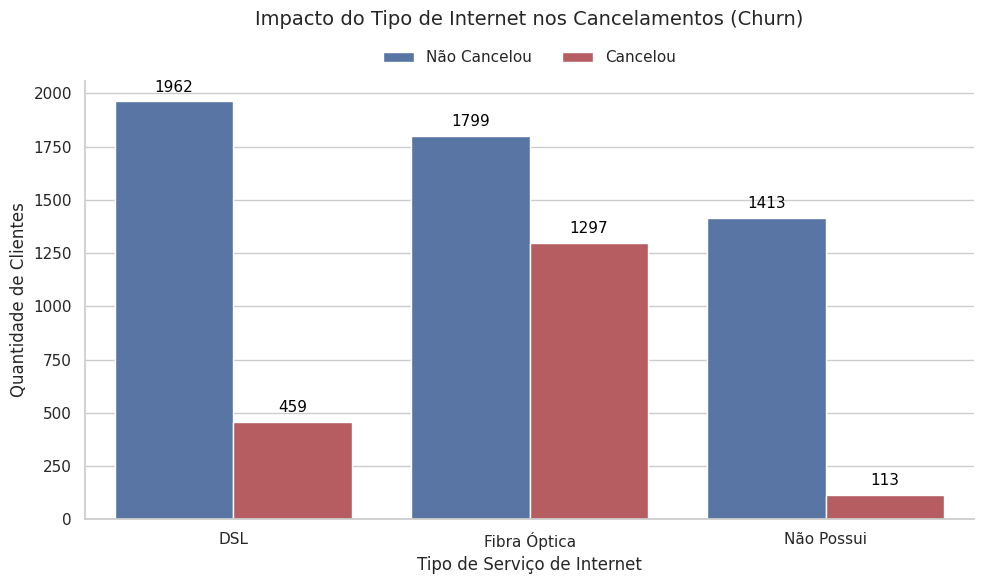


--- Taxa de Cancelamento por Tipo de Internet ---
Churn           Cancelou Não Cancelou
InternetService                      
DSL               18.96%       81.04%
Fibra Óptica      41.89%       58.11%
Não Possui          7.4%        92.6%


In [59]:
# Traduzindo os serviços de internet para um visual polido
dicionario_internet = {
    'Fiber optic': 'Fibra Óptica',
    'DSL': 'DSL',
    'No': 'Não Possui'
}

df_limpo['InternetService'] = df_limpo['InternetService'].replace(dicionario_internet)

# Configurando o visual do gráfico
plt.figure(figsize=(10, 6))

ax = sns.countplot(
    data=df_limpo,
    x='InternetService',
    hue='Churn',
    palette=['#4C72B0', '#C44E52']
)

# Melhorando a apresentação (Títulos e Rótulos)
plt.title('Impacto do Tipo de Internet nos Cancelamentos (Churn)', fontsize=14, pad=40)
plt.xlabel('Tipo de Serviço de Internet', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)

# A Legenda Polida no Topo
plt.legend(
    title='',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.10),
    ncol=2,
    frameon=False,
    fontsize=11
)

# Adicionando os números exatos em cima das barras
for p in ax.patches:
    altura = p.get_height()
    if pd.notna(altura) and altura > 0:
        ax.annotate(f'{int(altura)}',
                    (p.get_x() + p.get_width() / 2., altura),
                    ha='center', va='bottom',
                    fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Limpeza final do visual
sns.despine()
plt.tight_layout()
plt.show()

# Criando a tabela de proporção
print("\n--- Taxa de Cancelamento por Tipo de Internet ---")
tabela_internet = pd.crosstab(df_limpo['InternetService'], df_limpo['Churn'], normalize='index') * 100
print(tabela_internet.round(2).astype(str) + '%')

Taxa de Cancelamento Isolada por Tipo de Internet

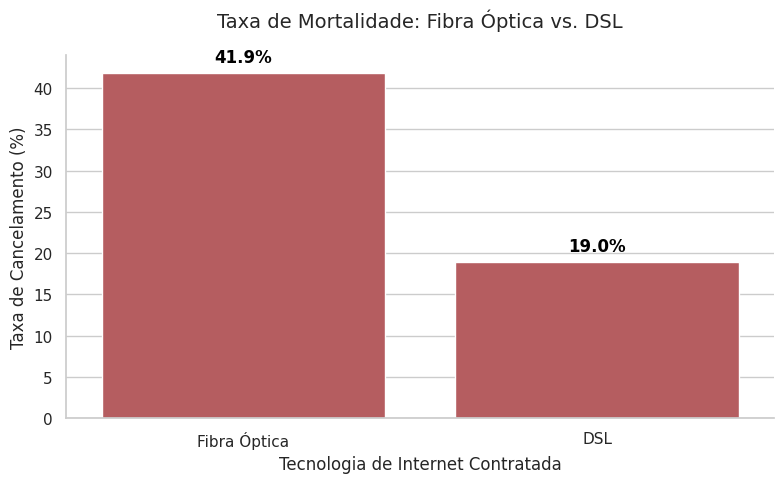

In [61]:
# Preparando os dados em Porcentagem (%)
df_internet_pct = (df_limpo.groupby('InternetService')['Churn']
                   .value_counts(normalize=True)
                   .rename('Taxa_Cancelamento')
                   .reset_index())

# O FILTRO DUPLO: Apenas quem Cancelou E tem serviço de Internet
df_internet_pct = df_internet_pct[
    (df_internet_pct['Churn'] == 'Cancelou') &
    (df_internet_pct['InternetService'] != 'Não Possui')
].copy()

df_internet_pct['Taxa_Cancelamento'] *= 100

# Ordenando do maior para o menor problema
df_internet_pct = df_internet_pct.sort_values(by='Taxa_Cancelamento', ascending=False)

# Configurando o visual do gráfico
plt.figure(figsize=(8, 5))

ax = sns.barplot(
    data=df_internet_pct,
    x='InternetService',
    y='Taxa_Cancelamento',
    color='#C44E52'
)

# Melhorando a apresentação (Títulos e Rótulos)
plt.title('Taxa de Mortalidade: Fibra Óptica vs. DSL', fontsize=14, pad=20)
plt.xlabel('Tecnologia de Internet Contratada', fontsize=12)
plt.ylabel('Taxa de Cancelamento (%)', fontsize=12)

# Adicionando as porcentagens exatas em cima das barras
for p in ax.patches:
    altura = p.get_height()
    if pd.notna(altura) and altura > 0:
        ax.annotate(f'{altura:.1f}%',
                    (p.get_x() + p.get_width() / 2., altura),
                    ha='center', va='bottom',
                    fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points', weight='bold')

# Limpeza final do visual
sns.despine()
plt.tight_layout()
plt.show()

Análise de Produto: O Paradoxo da Fibra Óptica

Ao refinarmos a análise e isolarmos apenas os clientes que possuem serviço de internet, descobrimos que o epicentro das perdas está no produto considerado premium do portfólio.

O Dobro do Risco: A tecnologia de Fibra Óptica apresenta uma taxa de mortalidade alarmante de 41.9%, custando à empresa proporcionalmente mais que o dobro de clientes em comparação com a tecnologia mais antiga e lenta (DSL, com 19%).

O Paradoxo Tecnológico: Em condições normais de mercado, conexões de fibra oferecem maior estabilidade e velocidade, o que deveria gerar maior retenção. O fato de a Fibra ser a grande vilã do Churn, especialmente no primeiro mês, levanta duas hipóteses críticas:

Choque de Preço (Valor Percebido): O custo da Fibra Óptica pode estar muito acima da média, gerando frustração imediata ao receber a primeira fatura.

Deficiência Operacional: Problemas agudos na instalação, instabilidade inicial da rede e ausência de suporte técnico adequado para uma tecnologia que exige maior complexidade de infraestrutura.

Próximos Passos Estratégicos: Para validar essas hipóteses, a análise aprofundará a relação entre o cancelamento de clientes de Fibra Óptica, o Valor da Mensalidade (Monthly Charges) e o acesso ao Suporte Técnico (Tech Support).

## Impacto do Valor da Mensalidade (O Fator Bolso)

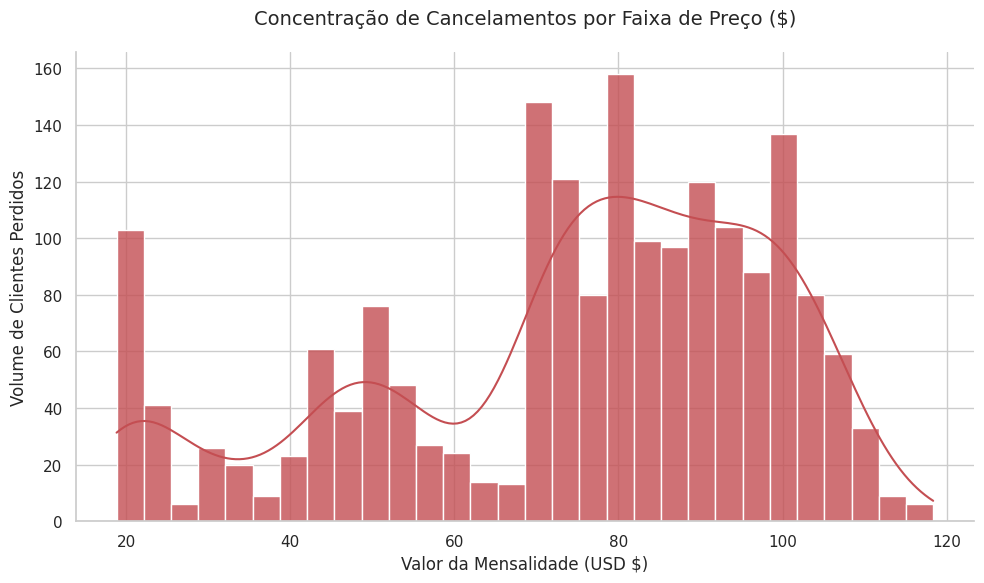

In [62]:
# O FILTRO CIRÚRGICO: Isolando apenas quem Cancelou
df_cancelou = df_limpo[df_limpo['Churn'] == 'Cancelou']

# Configurando o visual do gráfico
plt.figure(figsize=(10, 6))


sns.histplot(
    data=df_cancelou,
    x='MonthlyCharges',
    color='#C44E52',
    bins=30,
    kde=True,
    alpha=0.8
)

# Melhorando a apresentação (Títulos e Rótulos)
plt.title('Concentração de Cancelamentos por Faixa de Preço ($)', fontsize=14, pad=20)
plt.xlabel('Valor da Mensalidade (USD $)', fontsize=12)
plt.ylabel('Volume de Clientes Perdidos', fontsize=12)

# Limpeza final do visual
sns.despine()
plt.tight_layout()
plt.show()

Ao isolarmos a base de dados para analisar exclusivamente o comportamento financeiro dos clientes que abandonaram a empresa, identificamos um padrão agudo de sensibilidade a preço.

A Montanha do Churn: O gráfico de distribuição revela que as perdas não ocorrem de maneira uniforme. Existe uma concentração massiva de cancelamentos na faixa de faturas mais caras, formando um pico crítico entre $70 e $105.

A Conexão com o Produto: Este dado amarra as descobertas anteriores de forma definitiva. A faixa de preço que mais sofre evasão ($70+) é exatamente o ticket médio cobrado pelo serviço de Fibra Óptica.

Diagnóstico Final de Preço: O cliente não está cancelando porque a empresa, como um todo, é ruim. Ele está cancelando porque o pacote premium (Mensal + Fibra Óptica) gera uma fatura de alto valor que não se sustenta no primeiro mês de uso, gerando um atrito irreversível.

O Diagnóstico Final (Suporte Técnico na Fibra Óptica)

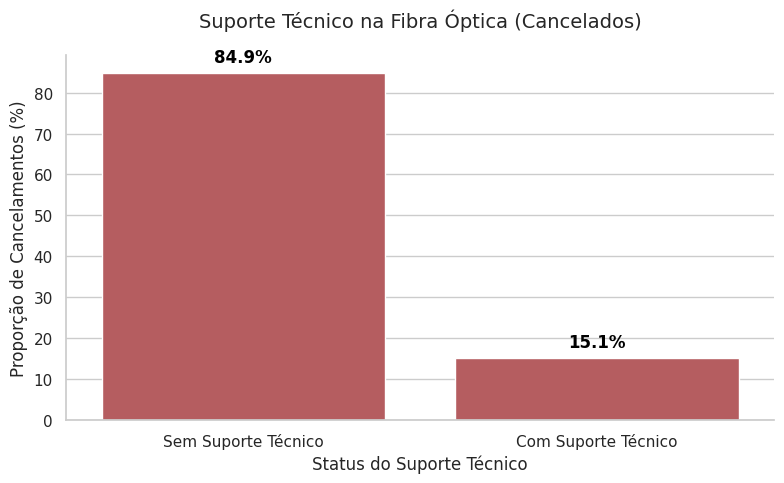

In [63]:
# Traduzindo a coluna de Suporte Técnico para um visual polido
dicionario_suporte = {
    'Yes': 'Com Suporte Técnico',
    'No': 'Sem Suporte Técnico',
    'No internet service': 'Sem Internet'
}

df_limpo['TechSupport'] = df_limpo['TechSupport'].replace(dicionario_suporte)

# O FILTRO CIRÚRGICO MÁXIMO: Apenas quem Cancelou E contratou Fibra Óptica
df_alvo = df_limpo[
    (df_limpo['Churn'] == 'Cancelou') &
    (df_limpo['InternetService'] == 'Fibra Óptica')
].copy()

# Preparando os dados em Porcentagem (%)
df_suporte_pct = (df_alvo['TechSupport']
                  .value_counts(normalize=True)
                  .rename('Percentual')
                  .reset_index())

df_suporte_pct['Percentual'] *= 100

# Configurando o visual do gráfico
plt.figure(figsize=(8, 5))

ax = sns.barplot(
    data=df_suporte_pct,
    x='TechSupport',
    y='Percentual',
    color='#C44E52'
)

# Melhorando a apresentação (Títulos e Rótulos)
plt.title('Suporte Técnico na Fibra Óptica (Cancelados)', fontsize=14, pad=20)
plt.xlabel('Status do Suporte Técnico', fontsize=12)
plt.ylabel('Proporção de Cancelamentos (%)', fontsize=12)

# Adicionando as porcentagens exatas em cima das barras
for p in ax.patches:
    altura = p.get_height()
    if pd.notna(altura) and altura > 0:
        ax.annotate(f'{altura:.1f}%',
                    (p.get_x() + p.get_width() / 2., altura),
                    ha='center', va='bottom',
                    fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points', weight='bold')

# Limpeza final do visual
sns.despine()
plt.tight_layout()
plt.show()

O Diagnóstico Final: A Tempestade Perfeita do Churn


A aplicação de um filtro cirúrgico cruzando os clientes perdidos de Fibra Óptica com a adesão ao Suporte Técnico (TechSupport) revela a causa-raiz do problema de retenção da companhia.

A Gota D'água: A esmagadora maioria dos clientes de Fibra Óptica que cancelam o serviço não possuía Suporte Técnico contratado.

A Falha de Produto e Atendimento: O cliente adquire um produto de alto valor agregado (Fibra Óptica) por um preço elevado ($70+). Como ele não tem suporte técnico atrelado ao plano, qualquer instabilidade de rede ou dificuldade técnica no primeiro mês de uso (fase de onboarding) se transforma em uma experiência catastrófica e sem resolução, culminando no cancelamento imediato.

Plano de Ação Sugerido (Conclusão Executiva):

Reformulação de Oferta: Embutir o "Suporte Técnico Premium" obrigatoriamente (ou como cortesia) nos primeiros 3 a 6 meses para todos os novos assinantes de Fibra Óptica.

Onboarding Proativo: Criar uma equipe de pós-venda que ligue ativamente para os clientes do plano Mensal de Fibra Óptica nas primeiras semanas para garantir que o serviço está funcionando perfeitamente antes da primeira fatura chegar.

# Relatório final


1. Introdução

O presente relatório documenta a Análise Exploratória de Dados (EDA) realizada sobre a base de clientes de uma empresa de telecomunicações. O objetivo principal deste projeto foi entender a fundo o problema de Churn (evasão de clientes), identificando o perfil de risco, os períodos críticos de abandono e as motivações por trás dessas perdas. Através da extração de insights baseados em dados, buscamos fornecer direcionamentos estratégicos para aumentar a retenção e mitigar o impacto financeiro da perda precoce de assinantes.


2. Limpeza e Tratamento de Dados

Para garantir a integridade da análise, a base de dados passou por um rigoroso processo de tratamento:

Detecção e Remoção de Inconsistências: Identificamos 224 registros que apresentavam strings vazias (não mapeadas como valores nulos padrão) na variável alvo (Churn). Esses registros foram removidos para evitar distorções estatísticas. O dataset final para análise contou com 7.043 clientes válidos.

Padronização e Tradução: Para fins de storytelling e apresentação executiva, as variáveis categóricas essenciais (Status do Cliente, Tipo de Contrato, Serviço de Internet e Suporte Técnico) foram traduzidas do inglês para o português, garantindo clareza nas visualizações.

3. Análise Exploratória de Dados (EDA)

A investigação seguiu uma abordagem de funil (drill-down), partindo do macro para o micro:

Balanceamento Inicial: Observou-se que 25.7% da base total de clientes optou pelo cancelamento.

Impacto do Contrato: Gráficos de proporção revelaram que a falta de fidelidade é um fator de risco extremo. 42.7% dos clientes em contratos de modalidade "Mensal" cancelam o serviço, contra apenas 2.8% nos contratos de 2 anos.

Janela Crítica (Tenure): Através de Boxplots e Histogramas, diagnosticamos um comportamento de Early Churn (evasão precoce). A mediana de tempo de permanência de quem cancela é de apenas 10 meses, com um volume massivo de perdas ocorrendo logo no 1º mês de uso.

O Paradoxo do Produto: Ao isolar os serviços, a Fibra Óptica (produto premium) despontou como o epicentro do problema, apresentando uma taxa de mortalidade de quase 42% (o dobro da tecnologia DSL).

Fator Financeiro e Suporte: A análise bivariada final confirmou que a evasão se concentra em faturas de alto valor (entre $70 e $105). Cruzando esse dado com a operação, descobrimos que a esmagadora maioria desses clientes de Fibra Óptica que cancelaram não possuía Suporte Técnico atrelado ao plano.


4. Conclusões e Insights

A análise conclui que o problema de Churn da companhia não é generalizado, mas sim cirúrgico. Existe uma "Tempestade Perfeita" de insatisfação perfeitamente mapeada no seguinte perfil: O cliente assina o plano Mensal de Fibra Óptica, recebe uma primeira fatura de alto valor (acima de $70) e, ao enfrentar instabilidades no primeiro mês sem ter cobertura de Suporte Técnico, opta pelo cancelamento imediato. O Churn atual é fruto de atrito na entrada (onboarding) e quebra de expectativa de valor, não de desgaste a longo prazo.


5. Recomendações Estratégicas

Com base nas evidências, recomenda-se à diretoria:

Reformulação do Onboarding da Fibra Óptica: Implementar uma "Régua de Boas-Vindas" com contato proativo da equipe de sucesso do cliente durante os primeiros 30 dias para garantir o funcionamento do serviço antes da primeira fatura.

Mudança no Pacote Premium: Tornar o "Suporte Técnico" obrigatório ou embutido como cortesia nos primeiros 3 a 6 meses para todos os novos contratos de Fibra Óptica, blindando o cliente no período de maior risco.

Auditoria de Vendas e Precificação: Revisar a comunicação de vendas do plano Mensal de Fibra Óptica para alinhar expectativas sobre a primeira fatura, evitando o "choque de preço" que hoje atua como gatilho para a evasão no Mês 1.